# 1. Manipulate data with ndarray

- `nd.array`는 `np.array` 마찬가지로 다차원 배열이고, 유사한 메소드들을 지원함.
- 하지만 `nd.array`는 CPU, GPU 그리고 분산 클라우드 아키텍처에서 비동기 연산을 지원하고, 자동 미분을 지원한다는 점에서 머신러닝에 이상적인 배열형태임.

## 1.1. 시작하기

- numpy와 유사한 함수, 메서드들을 제공함.
- `@cpu(0)`의 경우, 배열을 cpu 메모리에 할당했다는 의미임.

In [1]:
from mxnet import nd

In [2]:
nd.array(((1,2,3),(5,6,7)))


[[1. 2. 3.]
 [5. 6. 7.]]
<NDArray 2x3 @cpu(0)>

In [3]:
x = nd.ones((2,3))
x


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

In [4]:
y = nd.random.uniform(-1,1,(2,3))
y


[[0.09762704 0.18568921 0.43037868]
 [0.6885315  0.20552671 0.71589124]]
<NDArray 2x3 @cpu(0)>

In [5]:
x = nd.full((2,3), 2.0)
x


[[2. 2. 2.]
 [2. 2. 2.]]
<NDArray 2x3 @cpu(0)>

In [6]:
(x.shape, x.size, x.dtype)

((2, 3), 6, numpy.float32)

## 1.2. 연산

- NDArray은 다차원 배열에 대한 일반적인 수학 연산을 제공함.

In [7]:
x * y


[[0.19525409 0.37137842 0.86075735]
 [1.377063   0.41105342 1.4317825 ]]
<NDArray 2x3 @cpu(0)>

In [8]:
y.exp()


[[1.1025515 1.204048  1.5378398]
 [1.9907899 1.2281718 2.0460093]]
<NDArray 2x3 @cpu(0)>

In [9]:
nd.dot(x, y.T)


[[1.4273899 3.219899 ]
 [1.4273899 3.219899 ]]
<NDArray 2x2 @cpu(0)>

## 1.3. Indexing

In [10]:
y[1,2]


[0.71589124]
<NDArray 1 @cpu(0)>

In [11]:
y[:,1:3]


[[0.18568921 0.43037868]
 [0.20552671 0.71589124]]
<NDArray 2x2 @cpu(0)>

- array의 특정 element을 indexing 후 치환하는 연산 가능.

In [12]:
y[:,1:3] = 2
y


[[0.09762704 2.         2.        ]
 [0.6885315  2.         2.        ]]
<NDArray 2x3 @cpu(0)>

In [13]:
y[1:2,0:2] = 4
y


[[0.09762704 2.         2.        ]
 [4.         4.         2.        ]]
<NDArray 2x3 @cpu(0)>

## 1.4. Converting between MXNet NDArray and NumPy

- `nd.array` $\longrightarrow$ `np.array`

In [14]:
a = x.asnumpy()
(type(a), a)

(numpy.ndarray, array([[2., 2., 2.],
        [2., 2., 2.]], dtype=float32))

- `np.array` $\longrightarrow$  `nd.array` 

In [15]:
nd.array(a)


[[2. 2. 2.]
 [2. 2. 2.]]
<NDArray 2x3 @cpu(0)>

---

# 2. Create a neural network

In [16]:
from mxnet import nd
from mxnet.gluon import nn

## 2.1. Create your neural netwokr's first layer

### Define layer

In [17]:
layer = nn.Dense(2)
layer

Dense(None -> 2, linear)

### initialize weight
-  draws random values uniformly from $[−0.7,0.7]$.(정확한 것은 documentation 찾아보기.)

In [18]:
layer.initialize()

### feed forward

In [19]:
x = nd.random.uniform(-1,1,(3,4))
layer(x)


[[ 0.0009278  -0.00674768]
 [-0.02683341  0.00671751]
 [ 0.00798804  0.02131375]]
<NDArray 3x2 @cpu(0)>

input_size, weight_initialization은 feed forward 연산을 할 때, 실제 발생한다.

In [20]:
layer.weight.data()


[[-0.01631819 -0.00312688  0.0408415   0.04370362]
 [ 0.00404529 -0.0028032   0.00952624 -0.01501013]]
<NDArray 2x4 @cpu(0)>

## 2.2. Chain layers into a neural network

### LeNet example

In [21]:
net = nn.Sequential()

In [22]:
net.add(# Similar to Dense, it is not necessary to specify the input channels
        # by the argument `in_channels`, which will be  automatically inferred
        # in the first forward pass. Also, we apply a relu activation on the
        # output. In addition, we can use a tuple to specify a  non-square
        # kernel size, such as `kernel_size=(2,4)`
        nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        # One can also use a tuple to specify non-symmetric pool and stride sizes
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        # The dense layer will automatically reshape the 4-D output of last
        # max pooling layer into the 2-D shape: (x.shape[0], x.size/x.shape[0])
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))
net

Sequential(
  (0): Conv2D(None -> 6, kernel_size=(5, 5), stride=(1, 1), Activation(relu))
  (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (2): Conv2D(None -> 16, kernel_size=(3, 3), stride=(1, 1), Activation(relu))
  (3): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (4): Dense(None -> 120, Activation(relu))
  (5): Dense(None -> 84, Activation(relu))
  (6): Dense(None -> 10, linear)
)

- `nn.Sequential`와 `nn.Dense`은 모두 `nn.Block`에서 상속 받았기 때문에 usage가 유사함.

In [23]:
net.initialize()
# Input shape is (batch_size, color_channels, height, width)
x = nd.random.uniform(shape=(4,1,28,28))
y = net(x)
y.shape

(4, 10)

- `nn.Block`에 대한 indexing을 통해 특정 layer에 접근할 수 있음.

In [24]:
(net[0].weight.data().shape, net[5].bias.data().shape)

((6, 1, 5, 5), (84,))

## 2.3. Create a neural network flexibly

### `nn.Block`에 대한 subclassing을 통해, 보다 다양한 네트워크를 표현할 수 있음.

In [25]:
class MixMLP(nn.Block):
    def __init__(self, **kwargs):
        super(MixMLP, self).__init__(**kwargs)
        self.blk = nn.Sequential()
        self.blk.add(nn.Dense(3, activation='relu'),
                     nn.Dense(4, activation='relu'))
        self.dense = nn.Dense(5)
    def forward(self, x):
        y = nd.relu(self.blk(x)) 
        print(y) # 얘로 중간에 결과를 찍어볼 수 있음.
        return self.dense(y)

In [26]:
net = MixMLP()
net

MixMLP(
  (blk): Sequential(
    (0): Dense(None -> 3, Activation(relu))
    (1): Dense(None -> 4, Activation(relu))
  )
  (dense): Dense(None -> 5, linear)
)

In [27]:
net.initialize()
x = nd.random.uniform(shape=(2,2))
net(x)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<NDArray 2x4 @cpu(0)>



[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
<NDArray 2x5 @cpu(0)>

In [28]:
net.blk[1].weight.data()


[[-0.02634858  0.05334064  0.02748809]
 [ 0.06669661 -0.01711474  0.01647211]
 [-0.04485548  0.00594983 -0.06654498]
 [ 0.04964591 -0.06058505  0.03413684]]
<NDArray 4x3 @cpu(0)>

---

# 3. Automatic differentiation with autograd 

## 3.1. Basic usage

### Differentiating a function $f(x)=2x^{2}$

In [29]:
from mxnet import nd
from mxnet import autograd

- Start by assigning an initial value of $x$.

In [30]:
x = nd.array([[1, 2], [3, 4]])
x


[[1. 2.]
 [3. 4.]]
<NDArray 2x2 @cpu(0)>

- Store the gradient of $f(x)$ by invoking its `attach_grad` method.

In [31]:
x.attach_grad()

- Define the function `y=f(x)`.
- To let MXNet store `y`, so that we can compute gradients later, we need to put the definition inside a `autograd.record()` scope.

In [32]:
with autograd.record():
    y = 2 * x * x

- Invoke backprop by calling `y.backward()`.
- When y has more than one entry, `y.backward()` is equivalent to `y.sum().backward()`.

In [33]:
y.backward()

- You can fine the result of gradient at `x.grad`.

In [34]:
x.grad


[[ 4.  8.]
 [12. 16.]]
<NDArray 2x2 @cpu(0)>

## 3.2. Using Python control flows

이거 진짜 원래 그냥 이해해야되는게 정상임.

In [35]:
def f(a):
    b = a * 2
    while b.norm().asscalar() < 1000:
        b = b * 2
    if b.sum().asscalar() >= 0:
        c = b[0]
    else:
        c = b[1]
    return c

In [36]:
a = nd.random.uniform(shape=2)
a.attach_grad()
with autograd.record():
    c = f(a)
c.backward()

In [37]:
nd.random.uniform(shape=2)


[0.3834639 0.6457846]
<NDArray 2 @cpu(0)>

In [38]:
nd.random.uniform(shape=2).norm().asscalar()

0.6719643

---

# 4. Train the neural network

In [39]:
from mxnet import nd, gluon, init, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
from IPython import display
import matplotlib.pyplot as plt
import time

## Fashion MNIST

## 4.1. Get data

- [input] 28 by 28, grey scale img. (height, width, channel)
- [label] numpy scalar.

In [40]:
mnist_train = datasets.FashionMNIST(train=True)
X, y = mnist_train[0]
('X shape: ', X.shape, 'X dtype', X.dtype, 'y:', y)

('X shape: ', (28, 28, 1), 'X dtype', numpy.uint8, 'y:', 2)

- Visualize six examples

In [41]:
%matplotlib notebook
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
X, y = mnist_train[0:10]
# plot images
_, figs = plt.subplots(1, X.shape[0], figsize=(15, 15))
for f,x,yi in zip(figs, X,y):
    # 3D->2D by removing the last channel dim
    f.imshow(x.reshape((28,28)).asnumpy())
    ax = f.axes
    ax.set_title(text_labels[int(yi)])
    ax.title.set_fontsize(14)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<IPython.core.display.Javascript object>

- Convert the images to the **`(channel, height, width)`** format with a **floating point data** type.

In [42]:
transformator = transforms.Compose([
    transforms.ToTensor(), # change (h,w,c) -> (c, h, w) form & min-max norm
    transforms.Normalize(0.13, 0.31) # standardization
])
mnist_train = mnist_train.transform_first(transformator)
# transform : Returns a new dataset with each sample transformed by the transformer function fn.
# transform_first : Returns a new dataset with the first element of each sample transformed by the transformer function fn.

- `FashionMNIST` is a subclass of `gluon.data.Dataset`
- Load data with `gluon.data.DataLoader`

In [43]:
batch_size = 256
train_data = gluon.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=4)

**train_data** is an iterable object that yields batches of images and labels pairs. (`tf.data.dataset`과 유사함.)

In [44]:
for data, label in train_data:
    print(data.shape, label.shape)
    break

(256, 1, 28, 28) (256,)


We create a validation dataset and data loader.

In [45]:
mnist_valid = gluon.data.vision.FashionMNIST(train=False)
valid_data = gluon.data.DataLoader(mnist_valid.transform_first(transformator), batch_size=batch_size, num_workers=4)

## 4.2. Define the model

LeNet with Xavier

In [46]:
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))
net.initialize(init=init.Xavier())

In [47]:
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()

In [48]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

## 4.3. Train

In [49]:
def acc(output, label):
    # output: (batch, num_output) float32 ndarray
    # label: (batch, ) int32 ndarray
    return (output.argmax(axis=1) == label.astype('float32')).mean().asscalar()

In [50]:
for epoch in range(30):
    train_loss, train_acc, valid_acc = 0., 0., 0.
    tic = time.time()
    for data, label in train_data:
        # forward + backward
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output, label)
        loss.backward()
        # update parameters
        trainer.step(batch_size)
        # calculate training metrics
        train_loss += loss.mean().asscalar()
        train_acc += acc(output, label)
    # calculate validation accuracy
    for data, label in valid_data:
        valid_acc += acc(net(data), label)
    print("Epoch %d: loss %.3f, train acc %.3f, test acc %.3f, in %.1f sec" % (
            epoch, train_loss/len(train_data), train_acc/len(train_data),
            valid_acc/len(valid_data), time.time()-tic))

Epoch 0: loss 0.747, train acc 0.724, test acc 0.816, in 15.6 sec
Epoch 1: loss 0.479, train acc 0.819, test acc 0.845, in 15.6 sec
Epoch 2: loss 0.422, train acc 0.842, test acc 0.862, in 16.5 sec
Epoch 3: loss 0.379, train acc 0.859, test acc 0.866, in 15.6 sec
Epoch 4: loss 0.352, train acc 0.869, test acc 0.879, in 15.8 sec
Epoch 5: loss 0.332, train acc 0.877, test acc 0.885, in 15.5 sec
Epoch 6: loss 0.316, train acc 0.881, test acc 0.881, in 17.0 sec
Epoch 7: loss 0.303, train acc 0.886, test acc 0.884, in 15.8 sec
Epoch 8: loss 0.293, train acc 0.892, test acc 0.892, in 15.3 sec
Epoch 9: loss 0.281, train acc 0.896, test acc 0.893, in 16.2 sec
Epoch 10: loss 0.273, train acc 0.900, test acc 0.893, in 15.5 sec
Epoch 11: loss 0.261, train acc 0.903, test acc 0.898, in 14.2 sec
Epoch 12: loss 0.255, train acc 0.905, test acc 0.899, in 15.2 sec
Epoch 13: loss 0.246, train acc 0.908, test acc 0.894, in 15.4 sec
Epoch 14: loss 0.240, train acc 0.910, test acc 0.894, in 15.6 sec
Epoch

## 4.4. Save the model

Finally, we save the trained parameters onto disk, so that we can use them later.

In [51]:
net.save_parameters('net.params')

# 5. Predict with a pre-trained model

### YOU NEED A TRAINED MODEL FROM 4.3

## 5.1. Prerequisites

In [6]:
from mxnet import nd
from mxnet import gluon
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
from IPython import display
import matplotlib.pyplot as plt

In [2]:
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))

In [3]:
net.load_parameters('net.params')

## 5.2. Predict

- 정확한 Predicting을 위해서 학습 때, 진행했던 transforms과 동일한 작업을 해줘야됨.

In [4]:
transformator = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])

- 10 개의 test set에 대한 prediction

In [5]:
mnist_valid = datasets.FashionMNIST(train=False)
X, y = mnist_valid[:10]
preds = []
for x in X:
    x = transformator(x).expand_dims(axis=0)
    pred = net(x).argmax(axis=1)
    preds.append(pred.astype('int32').asscalar())

- Visualize the results.
    - pullover와 shirt를 잘 구분 못함.

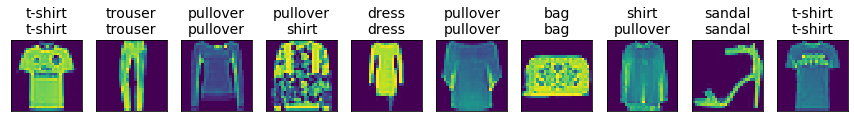

In [11]:
_, figs = plt.subplots(1, 10, figsize=(15, 15))
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
for f,x,yi,pyi in zip(figs, X, y, preds):
    f.imshow(x.reshape((28,28)).asnumpy())
    ax = f.axes
    ax.set_title(text_labels[yi]+'\n'+text_labels[pyi])
    ax.title.set_fontsize(14)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 5.3. Predict with models from Gluon model zoo

- [Model zoo of vision](https://mxnet.apache.org/api/python/docs/api/gluon/mxnet.gluon.model_zoo.html)에서 ImageNet 데이터로 pretrain한 resnet50_v2 모델을 import함. (역시 비전은 pretrained model이 매우 많구만.)

In [1]:
from mxnet.gluon.model_zoo import vision as models
from mxnet.gluon.utils import download
from mxnet import image

net = models.resnet50_v2(pretrained=True)

In [3]:
url = 'http://data.mxnet.io/models/imagenet/synset.txt'
fname = download(url)
with open(fname, 'r') as f:
    text_labels = [' '.join(l.split()[1:]) for l in f]

In [4]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/\
Golden_Retriever_medium-to-light-coat.jpg/\
365px-Golden_Retriever_medium-to-light-coat.jpg'
fname = download(url)
x = image.imread(fname)

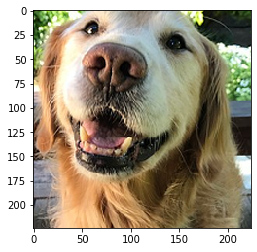

In [7]:
x = image.resize_short(x, 256)
x, _ = image.center_crop(x, (224,224))
plt.imshow(x.asnumpy())
plt.show()

In [8]:
def transform(data):
    data = data.transpose((2,0,1)).expand_dims(axis=0) # channel을 맨 앞으로.
    rgb_mean = nd.array([0.485, 0.456, 0.406]).reshape((1,3,1,1)) # rgb mean
    rgb_std = nd.array([0.229, 0.224, 0.225]).reshape((1,3,1,1)) # rgb variance
    return (data.astype('float32') / 255 - rgb_mean) / rgb_std # rgb standardization

In [10]:
prob = net(transform(x)).softmax()
idx = prob.topk(k=5)[0]
for i in idx:
    i = int(i.asscalar())
    print('With prob = %.5f, it contains %s' % (
        prob[0,i].asscalar(), text_labels[i]))

With prob = 0.97726, it contains golden retriever
With prob = 0.00877, it contains Irish setter, red setter
With prob = 0.00714, it contains English setter
With prob = 0.00134, it contains cocker spaniel, English cocker spaniel, cocker
With prob = 0.00127, it contains flat-coated retriever


# 6. Use GPUs

In [1]:
from mxnet import nd, gpu, gluon, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
import time

## 6.1. Allocate data to GPU

- NDArray와 Numpy의 가장 큰 차이 중 하나가 바로, NDArray는 원하는 cpu또는 gpu에 배열을 할당할 수 있다는 것이다.
- ctx(context) 파라미터에 gpu(device_id)를 통해 특정 gpu메모리에 값을 할당할 수 있음.

In [2]:
x = nd.ones((3,4), ctx=gpu(1))
x


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
<NDArray 3x4 @gpu(1)>

- multi gpu가 존재할 경우 하나의 gpu에 있는 데이터를 다른 gpu 상으로 복사할 수 있다.

In [3]:
x.copyto(gpu(0))


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
<NDArray 3x4 @gpu(0)>

## 6.2. Run an operation on a GPU

- GPU에 올라간 ndarray로 연산을 하려면, 적어도 inputs of this operation이 already on the GPU 상태임을 guarantee할 수 있어야 됨.
- 또한 두 객체에 대한 operation을 하려면, 하나의 GPU에 올라가 있어야됨.

In [4]:
y = nd.random.uniform(shape=(3,4), ctx = gpu(1))
x + y


[[1.59119   1.313164  1.7635204 1.9731786]
 [1.3545473 1.1167753 1.4378731 1.7348348]
 [1.6949831 1.333236  1.915918  1.6180661]]
<NDArray 3x4 @gpu(1)>

## 6.3. Run a neural network on a GPU

- 앞서 cpu로 학습한 LeNet모델을 gpu에서 학습하려면, input data와 parameters를 GPU에 올리면됨.

In [3]:
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))

- 두 가지 방법.<br>
     1) load the saved paraemters into GPU 0 directly.<br>
     2) `net.collect_params().reset_ctx`로 change the device를 할 수 있음.

In [6]:
net.load_parameters('net.params', ctx=gpu(0))

In [7]:
x = nd.random.uniform(shape=(1,1,28,28), ctx=gpu(0))
net(x)


[[ 0.8231138  -1.7601466   0.5605067   0.47985825 -0.06121701 -0.40308735
   2.5962396  -1.6593329   2.6624863  -1.7104449 ]]
<NDArray 1x10 @gpu(0)>

## 6.4. [Advanced] Multi-GPU training

In [1]:
from mxnet import nd, gpu, gluon, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
import time

In [2]:
## build input pipeline

batch_size = 256
transformer = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.13, 0.31)])

train_data = gluon.data.DataLoader(datasets.FashionMNIST(train=True).transform_first(transformer),batch_size, shuffle=True, num_workers=4)
valid_data = gluon.data.DataLoader(datasets.FashionMNIST(train=False).transform_first(transformer),batch_size, shuffle=False, num_workers=4)

In [4]:
# Diff 1: Use two GPUs for training.
devices = [gpu(0), gpu(1)]
# Diff 2: reinitialize the parameters and place them on multiple GPUs
net.collect_params().initialize(force_reinit=True, ctx=devices)

In [5]:
# Loss and trainer are the same as before
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})
for epoch in range(10):
    train_loss = 0.
    tic = time.time()
    for data, label in train_data:
        # Diff 3: split batch and load into corresponding devices
        data_list = gluon.utils.split_and_load(data, devices)
        label_list = gluon.utils.split_and_load(label, devices)
        # Diff 4: run forward and backward on each devices.
        # MXNet will automatically run them in parallel
        with autograd.record():
            losses = [softmax_cross_entropy(net(X), y) for X, y in zip(data_list, label_list)]
        for l in losses:
            l.backward()
        trainer.step(batch_size)
        # Diff 5: sum losses over all devices
        train_loss += sum([l.sum().asscalar() for l in losses])
    print("Epoch %d: loss %.3f, in %.1f sec" % (epoch, train_loss/len(train_data)/batch_size, time.time()-tic))

Epoch 0: loss 1.587, in 3.7 sec
Epoch 1: loss 0.758, in 3.6 sec
Epoch 2: loss 0.584, in 3.5 sec
Epoch 3: loss 0.503, in 3.4 sec
Epoch 4: loss 0.445, in 3.6 sec
Epoch 5: loss 0.408, in 3.5 sec
Epoch 6: loss 0.378, in 3.6 sec
Epoch 7: loss 0.358, in 3.4 sec
Epoch 8: loss 0.342, in 3.6 sec
Epoch 9: loss 0.327, in 3.6 sec
